<a href="https://colab.research.google.com/github/Zeeshan0123/LLM_Apps/blob/main/Diffusion_text_image_to_video_models_testing_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade diffusers accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
!pip install torch torchvision --force-reinstall --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.1/799.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

# **Testing Stable Diffusion Model**

In [ ]:
pipeline = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)
# stabilityai/stable-video-diffusion-img2vid-xt

In [ ]:
pipeline.enable_model_cpu_offload()

In [ ]:
image = load_image("image.webp")
image = image.resize((1024, 576))

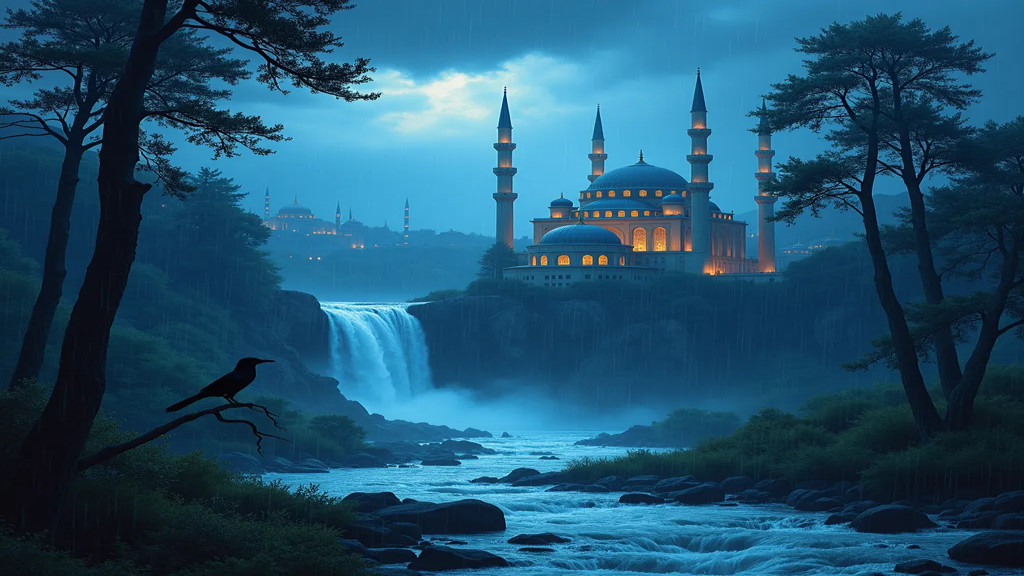

In [ ]:
image

In [ ]:
generator = torch.manual_seed(42)
frames = pipeline(image, decode_chunk_size=8, generator=generator).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
export_to_video(frames, "generated.mp4", fps=7)

'generated.mp4'

# **I2VGenXL Model testing**

In [ ]:
import torch
from diffusers import I2VGenXLPipeline
from diffusers.utils import export_to_gif, load_image,export_to_video
# pipeline.scheduler.config

In [ ]:
pipeline = I2VGenXLPipeline.from_pretrained("ali-vilab/i2vgen-xl", torch_dtype=torch.float16, variant="fp16")
pipeline.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipeline

I2VGenXLPipeline {
  "_class_name": "I2VGenXLPipeline",
  "_diffusers_version": "0.30.0",
  "_name_or_path": "ali-vilab/i2vgen-xl",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "I2VGenXLUNet"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
pipeline.scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'squaredcos_cap_v2'),
            ('trained_betas', None),
            ('clip_sample', False),
            ('set_alpha_to_one', True),
            ('steps_offset', 1),
            ('prediction_type', 'v_prediction'),
            ('thresholding', False),
            ('dynamic_thresholding_ratio', 0.995),
            ('clip_sample_range', 1.0),
            ('sample_max_value', 1.0),
            ('timestep_spacing', 'leading'),
            ('rescale_betas_zero_snr', True),
            ('_class_name', 'DDIMScheduler'),
            ('_diffusers_version', '0.26.1')])

In [ ]:
pipeline.scheduler

DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.30.0",
  "beta_end": 0.02,
  "beta_schedule": "squaredcos_cap_v2",
  "beta_start": 0.0001,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "v_prediction",
  "rescale_betas_zero_snr": true,
  "sample_max_value": 1.0,
  "set_alpha_to_one": true,
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [ ]:
# from diffusers import DPMSolverMultistepScheduler

# pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)
from diffusers import EulerAncestralDiscreteScheduler

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

In [ ]:
pipeline.scheduler

EulerAncestralDiscreteScheduler {
  "_class_name": "EulerAncestralDiscreteScheduler",
  "_diffusers_version": "0.30.0",
  "beta_end": 0.02,
  "beta_schedule": "squaredcos_cap_v2",
  "beta_start": 0.0001,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "v_prediction",
  "rescale_betas_zero_snr": true,
  "sample_max_value": 1.0,
  "set_alpha_to_one": true,
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [ ]:
pipeline.unet.enable_forward_chunking()
pipeline.enable_vae_slicing()
pipeline.enable_model_cpu_offload()

In [ ]:
image_url = "image.webp"
image = load_image(image_url).convert("RGB")

In [ ]:
prompt = "water is flowing trees are moving birds are  flying, grass is moving mosque brights"
negative_prompt="bad quality, worse quality, low resolution"
generator = torch.manual_seed(8888)

In [ ]:
frames = pipeline(
    prompt=prompt,
    image=image,
    num_inference_steps=50,
    negative_prompt=negative_prompt,
    guidance_scale=6.0,
    num_frames=25,
    decode_chunk_size=2,
    generator=generator
).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
export_to_video(frames, "generated_4.mp4", fps=7)

'generated_4.mp4'

In [ ]:
export_to_gif(frames, "i2video.gif")

'i2video.gif'

# **AnimateDiff Model Testing**

In [ ]:
import torch
from diffusers import AnimateDiffPipeline, DDIMScheduler, MotionAdapter
# from diffusers.utils import export_to_gif
from diffusers.utils import export_to_gif, load_image,export_to_video

Load the adapter first


In [ ]:
adapter = MotionAdapter.from_pretrained("guoyww/animatediff-motion-adapter-v1-5-2", torch_dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The config attributes {'motion_activation_fn': 'geglu', 'motion_attention_bias': False, 'motion_cross_attention_dim': None} were passed to MotionAdapter, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
pipeline = AnimateDiffPipeline.from_pretrained("emilianJR/epiCRealism", motion_adapter=adapter, torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
# scheduler = DDIMScheduler.from_pretrained(
#     "emilianJR/epiCRealism",
#     subfolder="scheduler",
#     clip_sample=False,
#     timestep_spacing="linspace",
#     beta_schedule="linear",
#     steps_offset=1,
# )
from diffusers import EulerAncestralDiscreteScheduler

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

In [ ]:
# pipeline.scheduler = scheduler
pipeline.enable_vae_slicing()
pipeline.enable_model_cpu_offload()

In [ ]:
image_url = "image.webp"
image = load_image(image_url).convert("RGB")

In [ ]:
output = pipeline(
    prompt="you are provided with image just make sure that in image water is flowing, trees are moving with air, many birds are flying, grass is moving , mosques are shining, 4k, high resolution i need exact same image with all these moving things",
    negative_prompt="bad quality, worse quality, low resolution",
    # image=image, they didnot accept the images i have tried it
    num_frames=16,
    guidance_scale=9.0,
    num_inference_steps=50,
    generator=torch.Generator("cpu").manual_seed(49),
)
frames = output.frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
export_to_gif(frames, "animation_2.gif")

'animation_2.gif'

# **CogXVideo generation model**

In [ ]:
import torch
import gc
from diffusers import CogVideoXPipeline, CogVideoXDDIMScheduler, CogVideoXDPMScheduler
# from diffusers.utils import export_to_video
from transformers import T5EncoderModel, T5Tokenizer
from diffusers.utils import load_image, export_to_video

In [ ]:
pipe = CogVideoXPipeline.from_pretrained("THUDM/CogVideoX-2b", torch_dtype=torch.float16)

In [ ]:
pipe

In [ ]:
# from diffusers import AutoencoderKL

# pipe.vae = AutoencoderKL()

In [ ]:
def reset_memory():
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.reset_accumulated_memory_stats()
    torch.cuda.reset_peak_memory_stats()

In [ ]:
def print_memory():
    memory = round(torch.cuda.memory_allocated() / 1024**3, 2)
    max_memory = round(torch.cuda.max_memory_allocated() / 1024**3, 2)
    max_reserved = round(torch.cuda.max_memory_reserved() / 1024**3, 2)
    print(f"{memory=} GB")
    print(f"{max_memory=} GB")
    print(f"{max_reserved=} GB")

In [ ]:
# pipe.vae.enable_tiling()
# pipe.enable_model_cpu_offload()
pipe.enable_sequential_cpu_offload()

In [ ]:
# pipe.vae.enable_slicing()
pipe.scheduler = CogVideoXDPMScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

In [ ]:
# text_tokenizer_id = "google/t5-v1_1-small"
# pipe.tokenizer = T5Tokenizer.from_pretrained(text_tokenizer_id)

In [ ]:
# image = load_image("image.webp")
# image = image.resize((1024, 576))

In [ ]:
generator = torch.Generator().manual_seed(32)
negative_prompt=("Distorted, discontinuous, ugly, blurry, low resolution, motionless, static")
prompt = (
    "Generate an realistic video of a serene forest with tall trees and a flowing river, with a waterfall in the background, an Islamic mosque nestled among the foliage, and a bird perched on a branch, during a huge storm with strong winds and heavy rain, in a style that combines elements of Vincent van Gogh and minimalistic. Add blue tones, lit with natural light."
)
video = pipe(prompt=prompt,
            #  negative_prompt=negative_prompt,
             guidance_scale=7.5,
             num_frames=32,
             num_inference_steps=20,
             generator=generator)
# video = pipe(prompt=prompt,
#             #  negative_prompt=negative_prompt,
#              guidance_scale=9,
#              num_frames=40,
#              num_inference_steps=70,
#              generator=generator)

In [ ]:
video = video.frames[0]

In [ ]:
export_to_video(video, "cogx_4.mp4", fps=8)

In [ ]:
reset_memory()

In [ ]:
print_memory()